In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
df = pd.read_csv("WDIData.csv", sep=",")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395276 entries, 0 to 395275
Data columns (total 68 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    395276 non-null  object 
 1   Country Code    395276 non-null  object 
 2   Indicator Name  395276 non-null  object 
 3   Indicator Code  395276 non-null  object 
 4   1960            38880 non-null   float64
 5   1961            44138 non-null   float64
 6   1962            45320 non-null   float64
 7   1963            46200 non-null   float64
 8   1964            46743 non-null   float64
 9   1965            48944 non-null   float64
 10  1966            48946 non-null   float64
 11  1967            49618 non-null   float64
 12  1968            50272 non-null   float64
 13  1969            51035 non-null   float64
 14  1970            68363 non-null   float64
 15  1971            75289 non-null   float64
 16  1972            77209 non-null   float64
 17  1973      

In [25]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN,NaN


In [26]:
df.fillna(-1, inplace=True)
filas_con_valores_numericos = df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']).apply(lambda x: x != -1).any(axis=1)

In [27]:
df.shape

(395276, 68)

In [28]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,-1.0,-1.0
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,-1.0,-1.0
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,-1.0,-1.0
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,-1.0,-1.0
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,-1.0,-1.0


In [29]:
df.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2019              0
2020              0
2021              0
2022              0
Unnamed: 67       0
Length: 68, dtype: int64

In [30]:
# Eliminar la última columna
df.drop(df.columns[-1], axis=1, inplace=True)

In [31]:
# Calcular la proporción de valores -1 en cada columna numérica
proporcion_valores_negativos = (df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']) == -1).mean()

# Definir un umbral para decidir si eliminar la columna
umbral = 0.5  # Por ejemplo, si más del 50% de los valores son -1, eliminaremos la columna

# Filtrar las columnas que superan el umbral
columnas_a_eliminar = proporcion_valores_negativos[proporcion_valores_negativos > umbral].index

# Eliminar las columnas del DataFrame original
df_filtrado = df.drop(columns=columnas_a_eliminar)

In [32]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395276 entries, 0 to 395275
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    395276 non-null  object 
 1   Country Code    395276 non-null  object 
 2   Indicator Name  395276 non-null  object 
 3   Indicator Code  395276 non-null  object 
 4   2004            395276 non-null  float64
 5   2005            395276 non-null  float64
 6   2006            395276 non-null  float64
 7   2007            395276 non-null  float64
 8   2008            395276 non-null  float64
 9   2009            395276 non-null  float64
 10  2010            395276 non-null  float64
 11  2011            395276 non-null  float64
 12  2012            395276 non-null  float64
 13  2013            395276 non-null  float64
 14  2014            395276 non-null  float64
 15  2015            395276 non-null  float64
 16  2016            395276 non-null  float64
 17  2017      

In [33]:
df_filtrado.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,3.952760e+05,3.952760e+05,3.952760e+05,3.952760e+05,3.952760e+05,3.952760e+05,3.952760e+05,3.952760e+05,3.952760e+05,3.952760e+05,3.952760e+05,3.952760e+05,3.952760e+05,3.952760e+05,3.952760e+05,3.952760e+05
mean,6.704126e+11,7.249859e+11,8.063586e+11,9.629859e+11,1.062905e+12,1.103202e+12,1.297379e+12,1.448587e+12,1.523187e+12,1.667863e+12,1.808419e+12,1.854529e+12,2.032370e+12,2.146320e+12,2.394869e+12,1.624544e+13
std,5.249935e+13,5.723624e+13,6.039239e+13,6.614832e+13,6.870679e+13,7.023267e+13,7.984594e+13,8.702206e+13,8.808035e+13,9.585851e+13,1.043399e+14,1.065791e+14,1.184129e+14,1.267369e+14,1.445344e+14,8.576845e+15
min,-5.361126e+15,-7.157321e+15,-6.200057e+15,-1.691820e+14,-4.636015e+14,-1.716620e+14,-1.827709e+14,-2.168927e+14,-2.431930e+14,-2.853262e+14,-3.543931e+14,-3.823398e+14,-3.970130e+14,-4.306058e+14,-6.109890e+14,-1.155334e+15
25%,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
50%,-1.000000e+00,1.780043e-01,2.258436e-01,3.545856e-01,3.510449e-01,3.620103e-01,1.474902e+00,1.120397e+00,1.268477e+00,1.001805e+00,1.796238e+00,1.700000e+00,1.274063e+00,9.874947e-01,8.229368e-01,4.447908e-01
75%,4.312004e+01,4.840000e+01,4.900000e+01,5.023923e+01,5.170241e+01,5.201765e+01,5.682513e+01,5.747779e+01,5.758466e+01,5.714539e+01,6.130000e+01,6.281235e+01,5.972676e+01,5.930000e+01,5.497308e+01,5.384110e+01
max,1.288384e+16,1.448172e+16,1.529797e+16,1.706973e+16,1.679243e+16,1.601307e+16,1.769461e+16,1.878185e+16,1.518257e+16,1.462878e+16,1.464430e+16,1.325074e+16,1.442551e+16,1.675691e+16,2.173981e+16,5.391345e+18


In [34]:
# Calcular la proporción de valores -1 en cada fila
proporcion_valores_negativos_fila = (df_filtrado.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']) == -1).mean(axis=1)

# Definir un umbral para decidir si eliminar la fila
umbral_filas = 0.5  # Por ejemplo, si más del 50% de los valores son -1, eliminaremos la fila

# Filtrar las filas que superan el umbral
filas_a_eliminar = proporcion_valores_negativos_fila[proporcion_valores_negativos_fila > umbral_filas].index

# Eliminar las filas del DataFrame filtrado
df_filtrado = df_filtrado.drop(index=filas_a_eliminar)

In [35]:
df_filtrado.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,12.990589,13.394404,13.835255,14.257120,14.687203,15.124112,15.545214,16.028677,16.447499,16.914625,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,4.312080,4.530435,4.759641,5.004145,5.237581,5.483481,5.733854,5.957514,6.224276,6.473301,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,34.220485,34.727444,35.159518,35.694984,36.102188,36.447583,36.849648,37.180314,37.540749,37.870347,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,23.749531,23.493013,25.191221,26.807937,25.943316,26.193895,27.400110,28.914348,31.666928,31.695183,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,10.910243,10.442796,12.518041,12.527150,12.986509,15.527791,14.462760,16.100904,19.375171,18.672306,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285


In [36]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218872 entries, 0 to 395275
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    218872 non-null  object 
 1   Country Code    218872 non-null  object 
 2   Indicator Name  218872 non-null  object 
 3   Indicator Code  218872 non-null  object 
 4   2004            218872 non-null  float64
 5   2005            218872 non-null  float64
 6   2006            218872 non-null  float64
 7   2007            218872 non-null  float64
 8   2008            218872 non-null  float64
 9   2009            218872 non-null  float64
 10  2010            218872 non-null  float64
 11  2011            218872 non-null  float64
 12  2012            218872 non-null  float64
 13  2013            218872 non-null  float64
 14  2014            218872 non-null  float64
 15  2015            218872 non-null  float64
 16  2016            218872 non-null  float64
 17  2017      

In [37]:
df_filtrado.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,2.188720e+05,2.188720e+05,2.188720e+05,2.188720e+05,2.188720e+05,2.188720e+05,2.188720e+05,2.188720e+05,2.188720e+05,2.188720e+05,2.188720e+05,2.188720e+05,2.188720e+05,2.188720e+05,2.188720e+05,2.188720e+05
mean,1.202951e+12,1.297332e+12,1.442506e+12,1.722312e+12,1.900286e+12,1.972040e+12,2.342172e+12,2.616065e+12,2.750871e+12,3.006859e+12,3.257975e+12,3.338362e+12,3.659917e+12,3.863947e+12,4.311356e+12,2.932338e+13
std,7.053583e+13,7.688776e+13,8.112039e+13,8.884154e+13,9.226727e+13,9.431441e+13,1.072903e+14,1.169328e+14,1.183538e+14,1.288024e+14,1.401980e+14,1.432056e+14,1.591070e+14,1.702911e+14,1.942070e+14,1.152610e+16
min,-5.361126e+15,-7.157321e+15,-6.200057e+15,-1.691820e+14,-4.636015e+14,-1.716620e+14,-1.827709e+14,-2.168927e+14,-2.431930e+14,-2.853262e+14,-3.543931e+14,-3.823398e+14,-3.970130e+14,-4.306058e+14,-6.109890e+14,-1.155334e+15
25%,1.774744e+00,3.196564e+00,3.500000e+00,3.791557e+00,4.000000e+00,4.069903e+00,5.000000e+00,5.226581e+00,5.299083e+00,5.000000e+00,4.987924e+00,4.500000e+00,4.060076e+00,3.559478e+00,3.032975e+00,2.471406e+00
50%,2.380058e+01,2.840000e+01,2.978182e+01,3.173077e+01,3.318609e+01,3.420000e+01,3.690680e+01,3.843139e+01,3.914112e+01,3.801988e+01,3.800000e+01,3.633790e+01,3.484956e+01,3.238095e+01,2.943685e+01,2.621079e+01
75%,6.938770e+02,1.404593e+03,2.229507e+03,3.044140e+03,4.054500e+03,4.710000e+03,6.439250e+03,8.039318e+03,9.495391e+03,8.893166e+03,8.848629e+03,8.074165e+03,7.516620e+03,6.019835e+03,4.761535e+03,3.969094e+03
max,1.288384e+16,1.448172e+16,1.529797e+16,1.706973e+16,1.679243e+16,1.601307e+16,1.769461e+16,1.878185e+16,1.518257e+16,1.462878e+16,1.464430e+16,1.325074e+16,1.442551e+16,1.675691e+16,2.173981e+16,5.391345e+18


In [38]:
df_filtrado.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
dtype: int64

## Cruce las variables que considere que son las más importantes para hallar los elementos clave que lo pueden llevar a comprender lo que está causando el problema encontrado.

/tmp/ipykernel_7957/1726650514.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code']).corr()


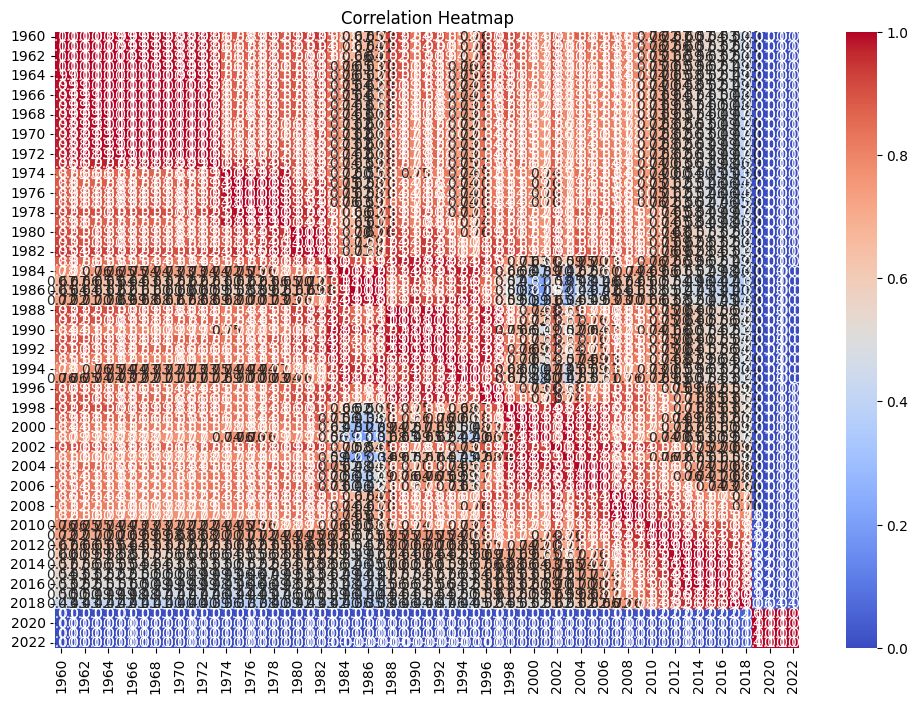

In [39]:
# Calcular la matriz de correlación
correlation_matrix = df.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code']).corr()

# Visualizar la matriz de correlación utilizando un mapa de calor de Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


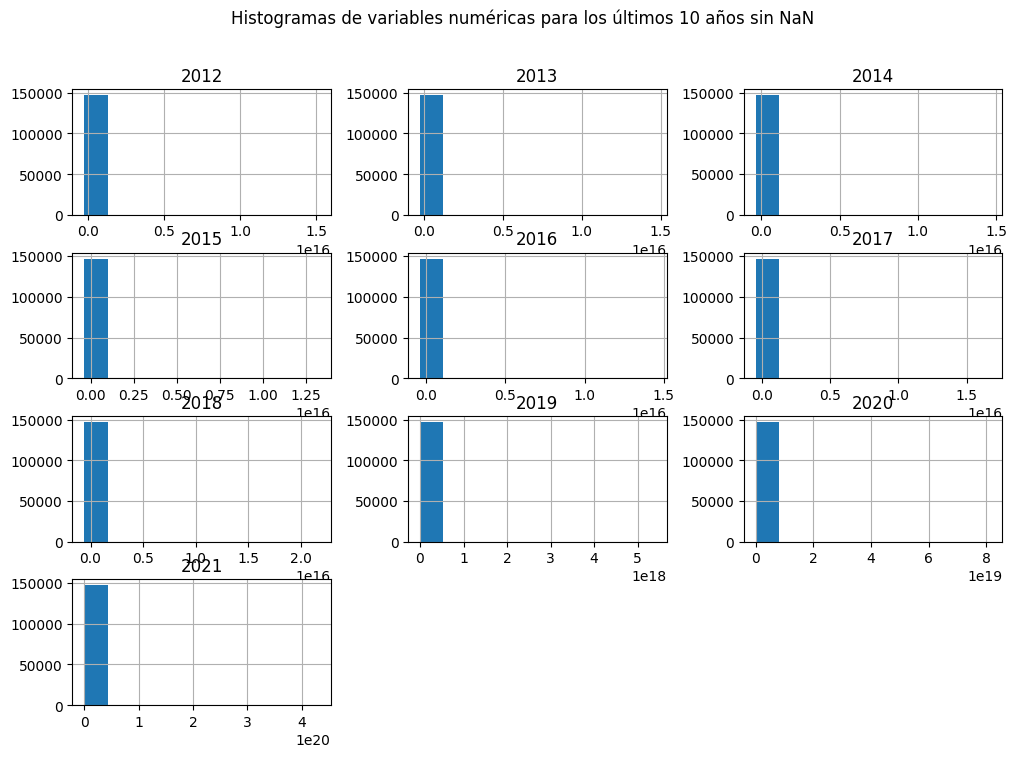

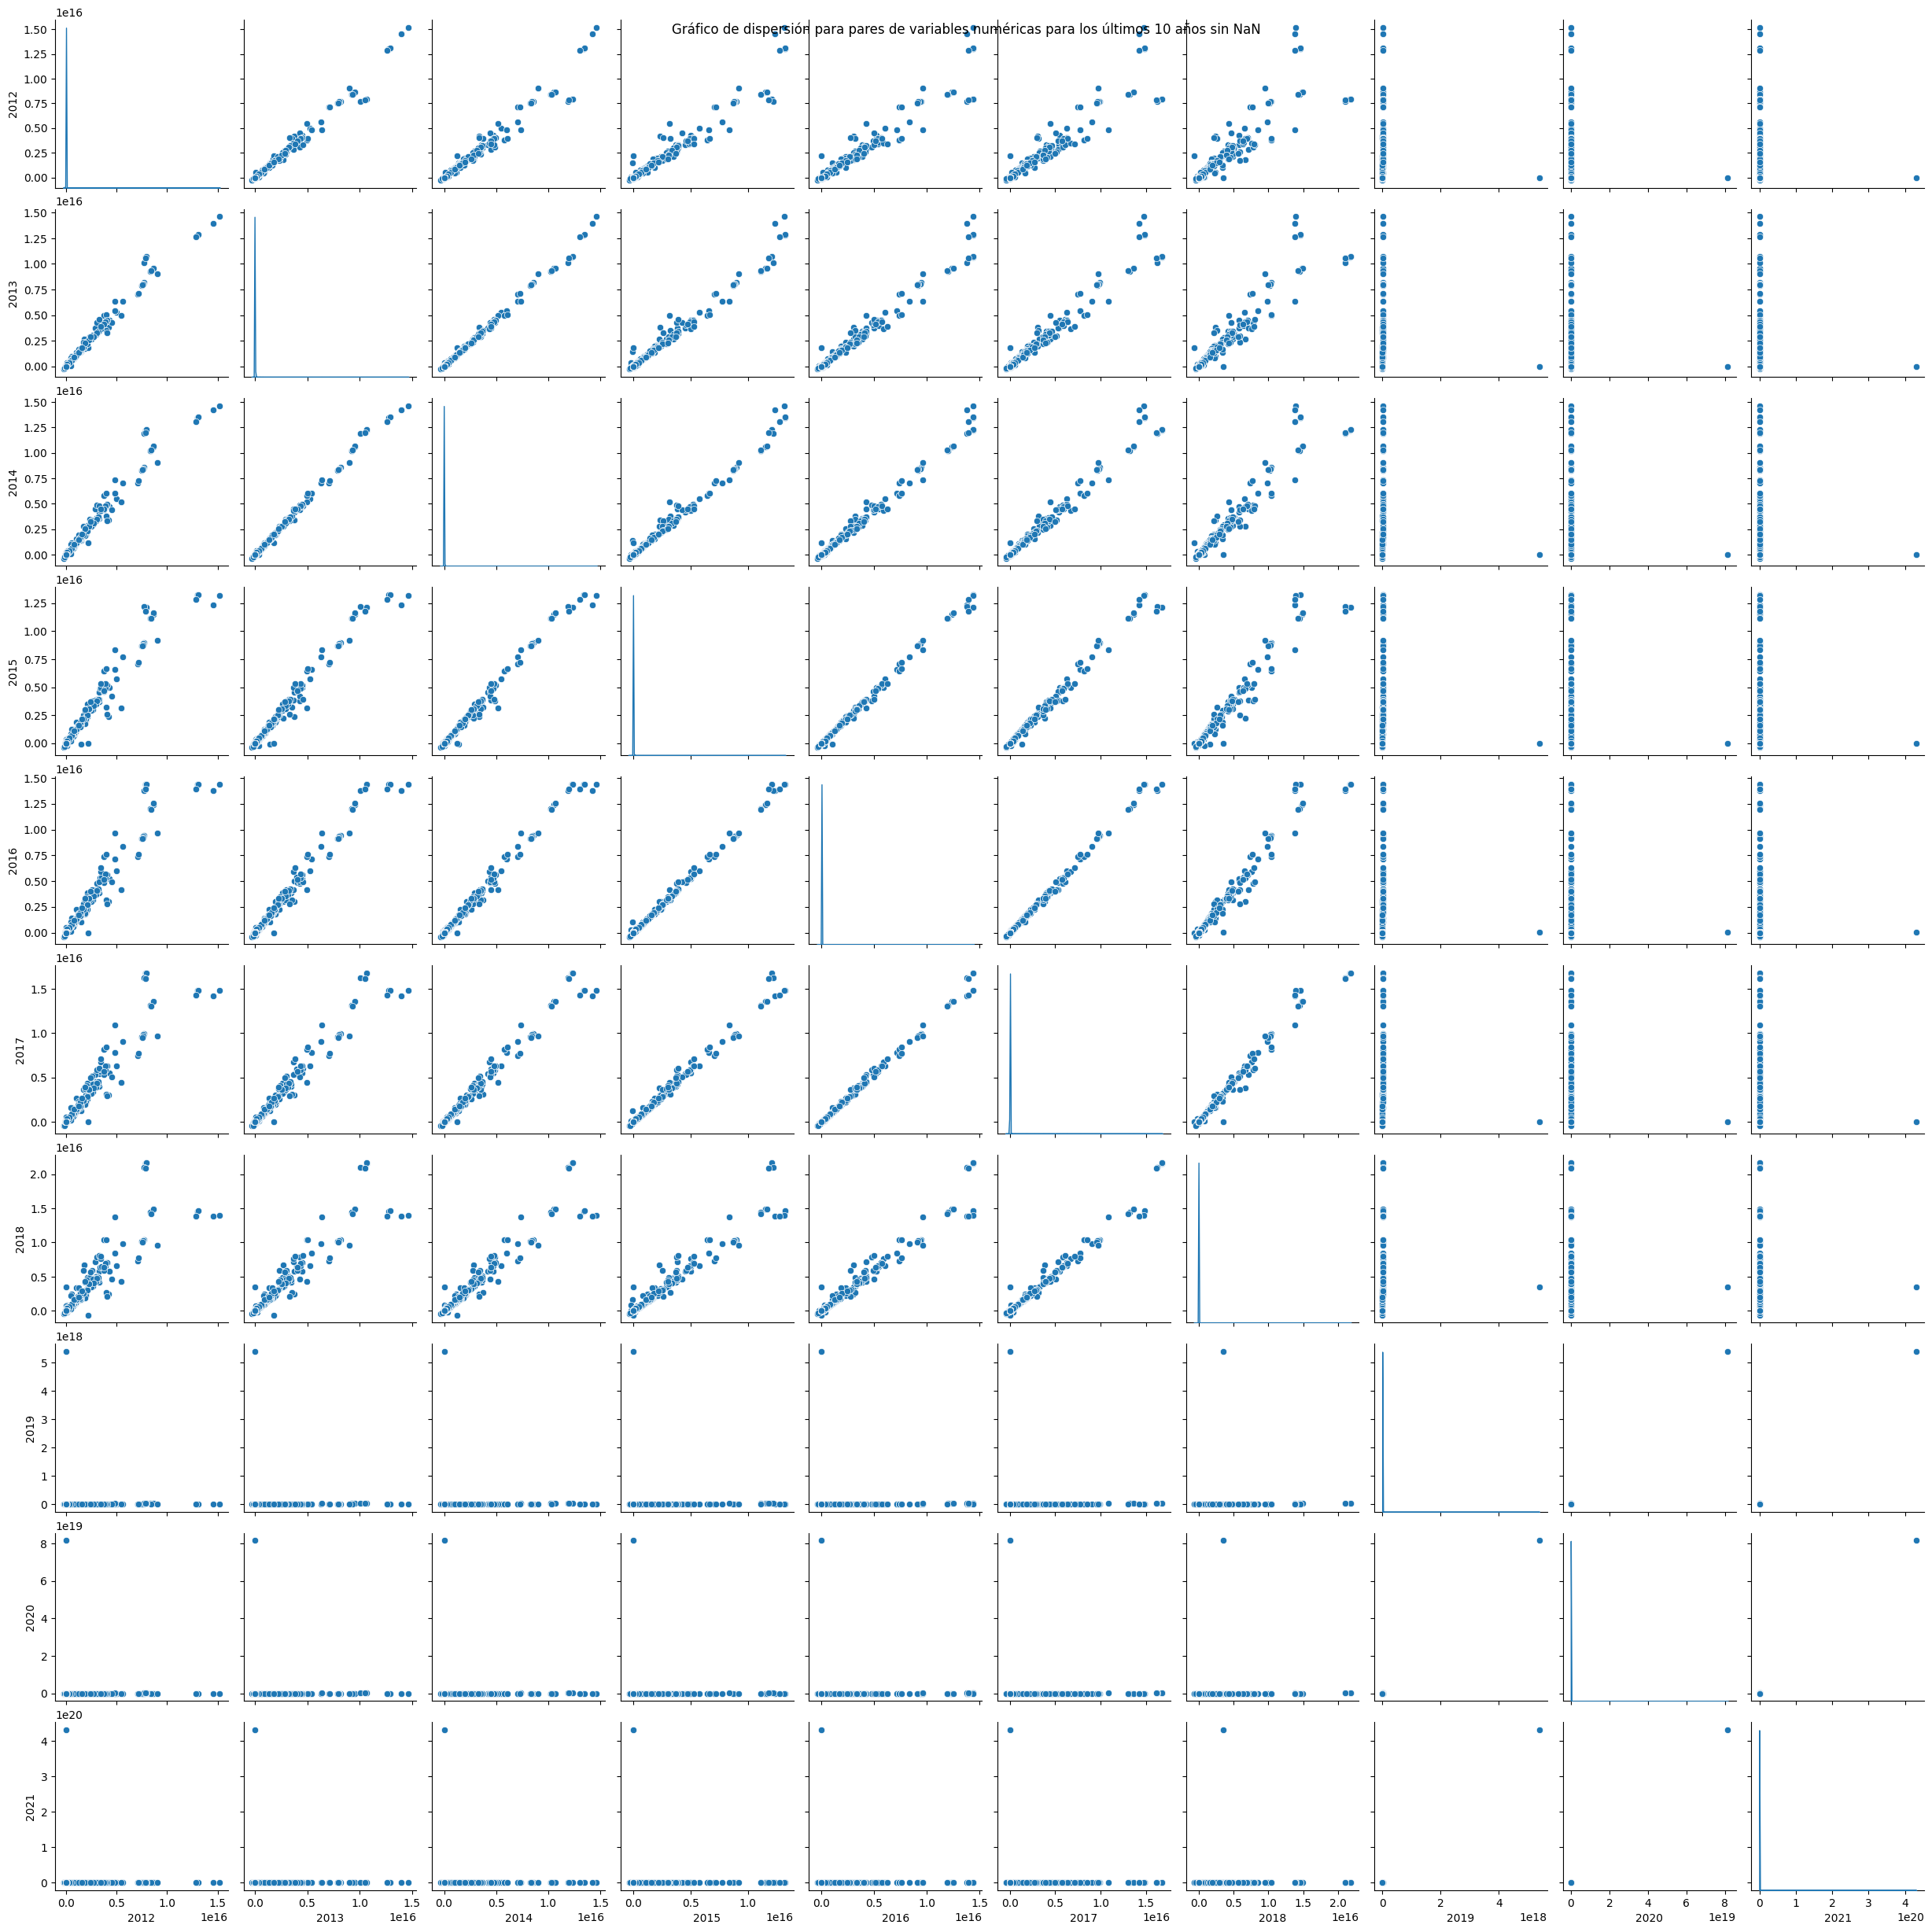

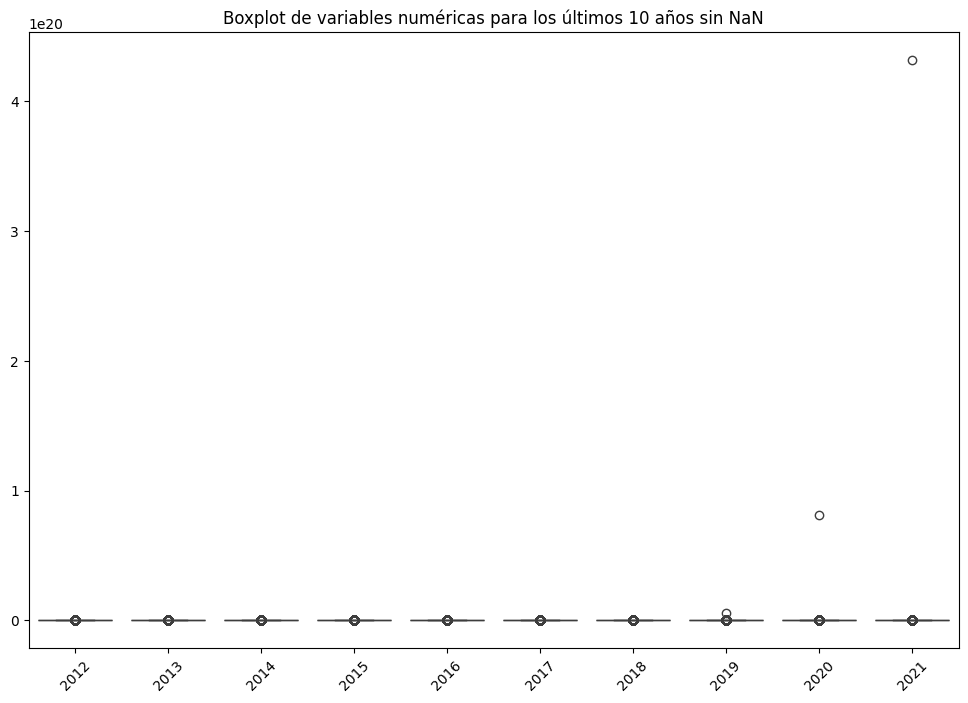

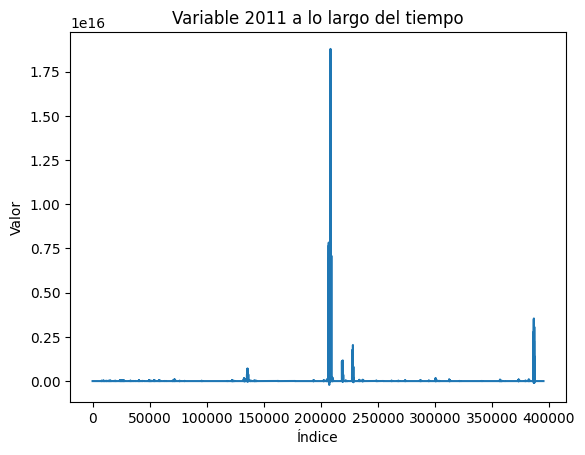

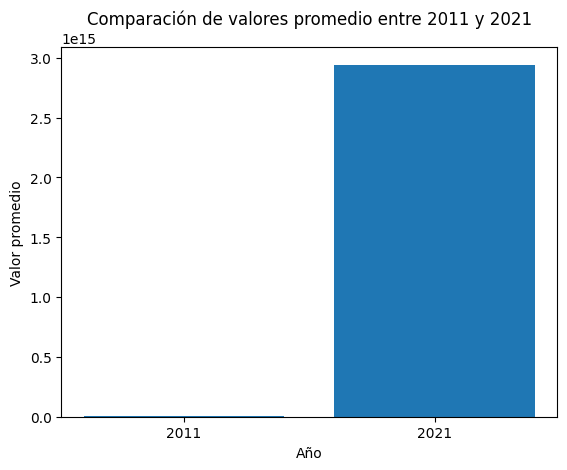

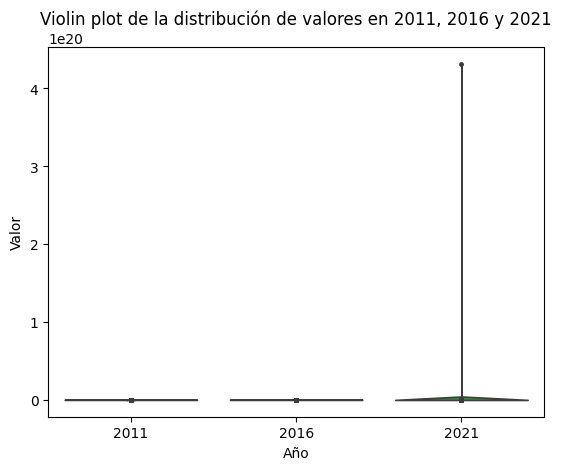

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('WDIData.csv')

# Seleccionar las columnas relevantes para el análisis
selected_columns = ['Country Name', 'Indicator Name', 'Indicator Code', 
                    '2011', '2012', '2013', '2014', '2015', '2016', 
                    '2017', '2018', '2019', '2020', '2021']
selected_data = df[selected_columns]

# Calcular la proporción de valores -1 en cada columna numérica
proporcion_valores_negativos = (selected_data.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code']) == -1).mean()

# Definir un umbral para decidir si eliminar la columna
umbral = 0.5  # Por ejemplo, si más del 50% de los valores son -1, eliminaremos la columna

# Filtrar las columnas que superan el umbral
columnas_a_eliminar = proporcion_valores_negativos[proporcion_valores_negativos > umbral].index

# Eliminar las columnas del DataFrame original
df_filtrado = selected_data.drop(columns=columnas_a_eliminar)

# Eliminar filas que contienen valores NaN del DataFrame filtrado
df_filtrado_sin_nan = df_filtrado.dropna()

# Seleccionar solo los últimos 10 años del DataFrame filtrado sin NaN
df_ultimos_10_anios_sin_nan = df_filtrado_sin_nan.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code']).iloc[:, -10:]

# Visualizar histogramas para variables numéricas
df_ultimos_10_anios_sin_nan.hist(figsize=(12, 8))
plt.suptitle('Histogramas de variables numéricas para los últimos 10 años sin NaN')
plt.show()

# Visualizar gráfico de dispersión para pares de variables numéricas
sns.pairplot(df_ultimos_10_anios_sin_nan, diag_kind='kde')
plt.suptitle('Gráfico de dispersión para pares de variables numéricas para los últimos 10 años sin NaN')
plt.show()

# Visualizar boxplots para comparar variables numéricas entre diferentes grupos
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_ultimos_10_anios_sin_nan)
plt.title('Boxplot de variables numéricas para los últimos 10 años sin NaN')
plt.xticks(rotation=45)
plt.show()

# Gráfico de línea para una variable a lo largo del tiempo (por ejemplo, '2011')
plt.plot(df_filtrado_sin_nan['2011'])
plt.title('Variable 2011 a lo largo del tiempo')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.show()

# Gráfico de barras para comparar valores de diferentes años (por ejemplo, '2011' y '2021')
plt.bar(['2011', '2021'], [df_filtrado_sin_nan['2011'].mean(), df_filtrado_sin_nan['2021'].mean()])
plt.title('Comparación de valores promedio entre 2011 y 2021')
plt.xlabel('Año')
plt.ylabel('Valor promedio')
plt.show()


# Violin plot para comparar la distribución de una variable en diferentes años
sns.violinplot(data=df_filtrado_sin_nan[['2011', '2016', '2021']], inner='point')
plt.title('Violin plot de la distribución de valores en 2011, 2016 y 2021')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.show()


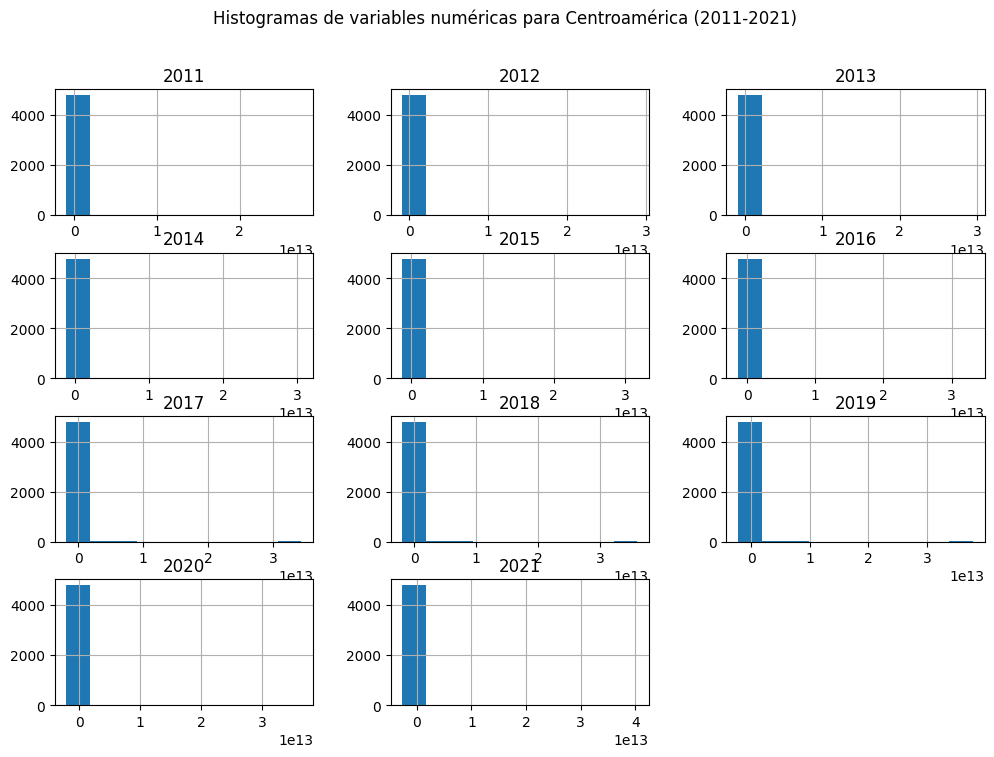

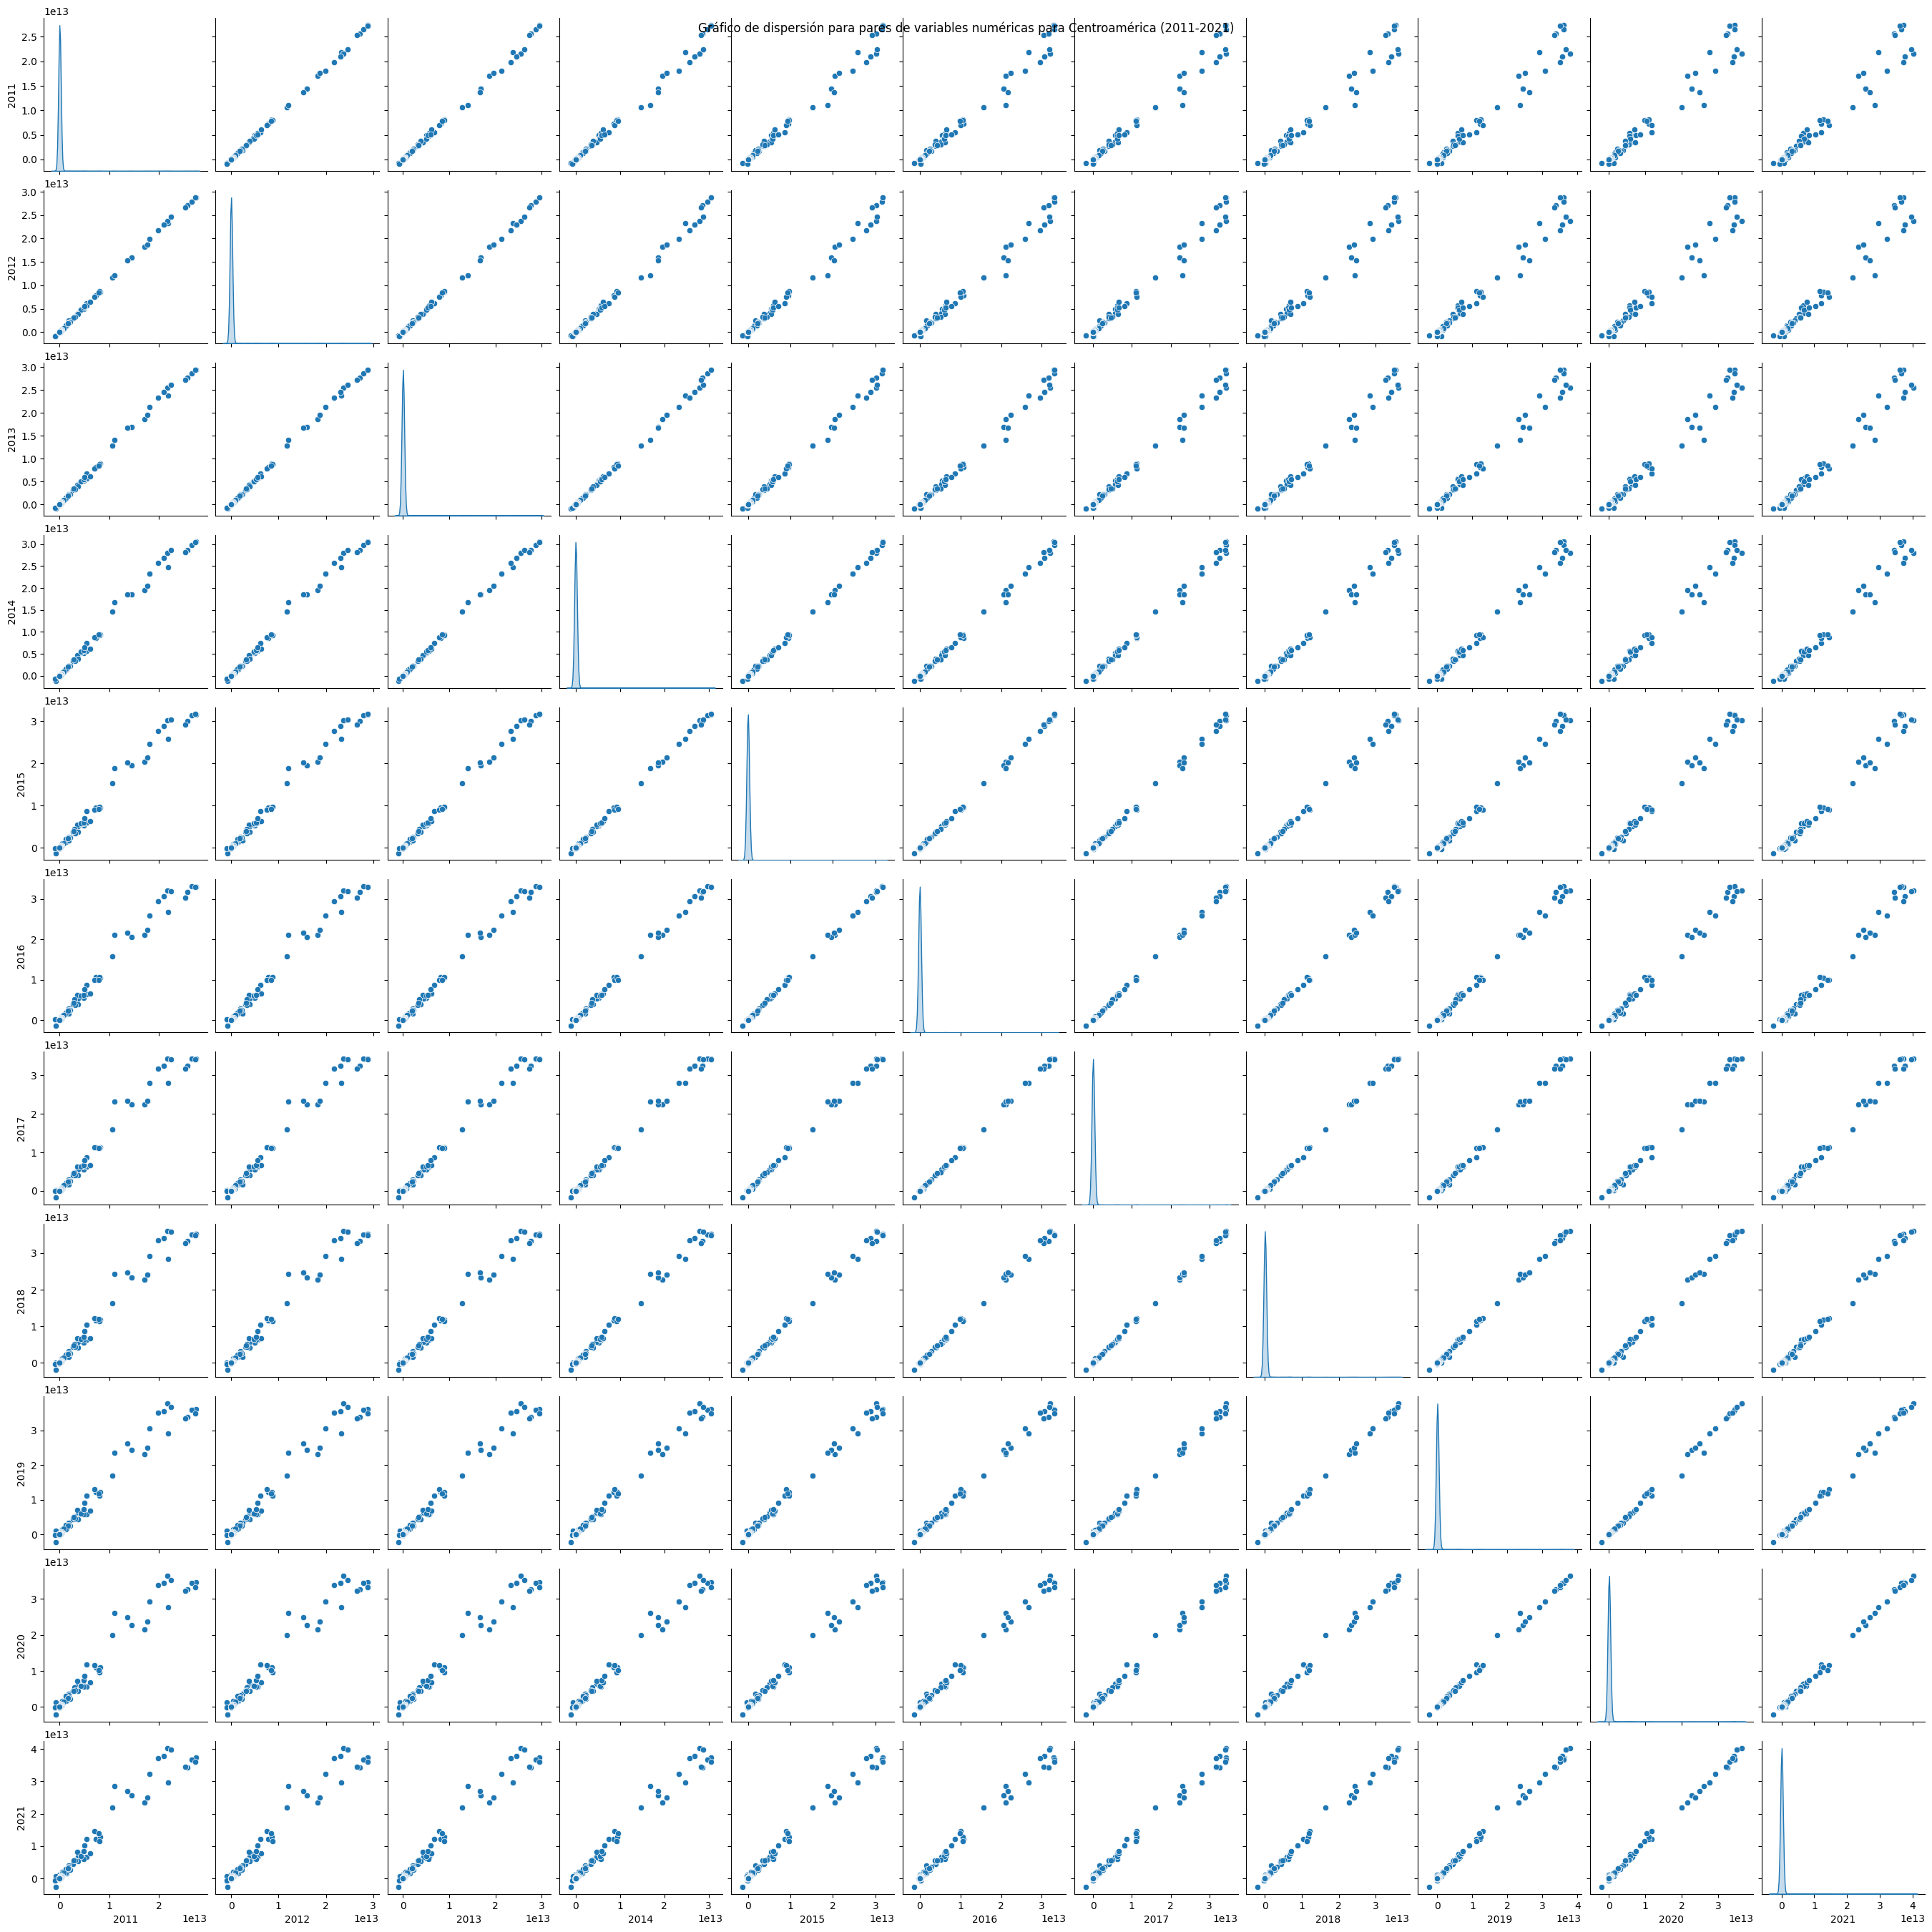

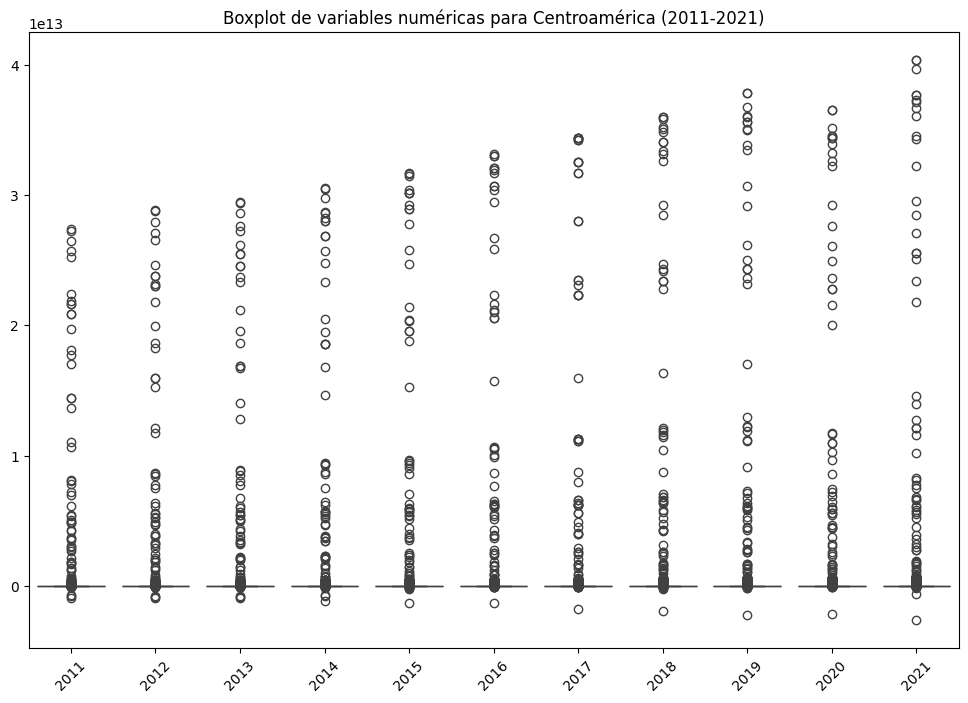

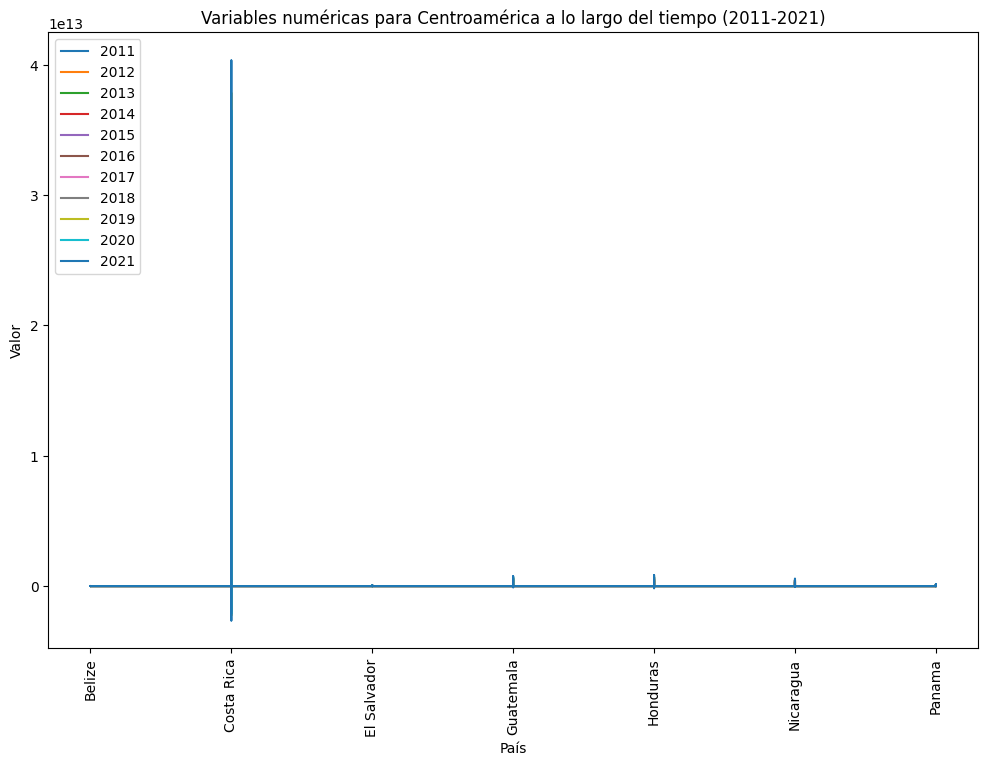

/tmp/ipykernel_7957/2314969425.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centroamerica['Total'] = df_centroamerica.iloc[:, 3:].sum(axis=1)
/tmp/ipykernel_7957/2314969425.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country Name', y='Total', data=df_centroamerica, palette='viridis')


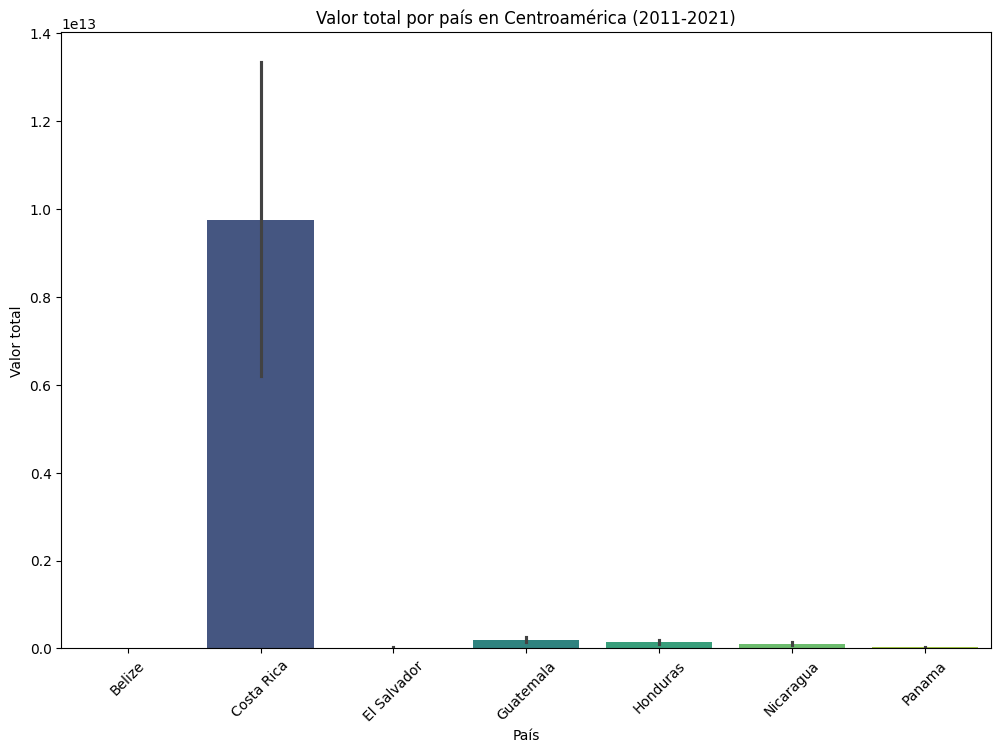

In [41]:
# Lista de países de Centroamérica
paises_centroamerica = ['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama']

# Filtrar el DataFrame para incluir solo los países de Centroamérica
df_centroamerica = df_filtrado_sin_nan[df_filtrado_sin_nan['Country Name'].isin(paises_centroamerica)]

# Visualizar histogramas para variables numéricas
df_centroamerica.iloc[:, 3:].hist(figsize=(12, 8))
plt.suptitle('Histogramas de variables numéricas para Centroamérica (2011-2021)')
plt.show()

# Visualizar gráfico de dispersión para pares de variables numéricas
sns.pairplot(df_centroamerica.iloc[:, 3:], diag_kind='kde')
plt.suptitle('Gráfico de dispersión para pares de variables numéricas para Centroamérica (2011-2021)')
plt.show()

# Visualizar boxplots para comparar variables numéricas entre diferentes grupos
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_centroamerica.iloc[:, 3:])
plt.title('Boxplot de variables numéricas para Centroamérica (2011-2021)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de línea para varias variables a lo largo del tiempo
plt.figure(figsize=(12, 8))
for column in df_centroamerica.columns[3:]:
    plt.plot(df_centroamerica['Country Name'], df_centroamerica[column], label=column)
plt.title('Variables numéricas para Centroamérica a lo largo del tiempo (2011-2021)')
plt.xlabel('País')
plt.ylabel('Valor')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.show()

# Gráfico de barras apiladas para comparar el valor total entre diferentes años
df_centroamerica['Total'] = df_centroamerica.iloc[:, 3:].sum(axis=1)
plt.figure(figsize=(12, 8))
sns.barplot(x='Country Name', y='Total', data=df_centroamerica, palette='viridis')
plt.title('Valor total por país en Centroamérica (2011-2021)')
plt.xlabel('País')
plt.ylabel('Valor total')
plt.xticks(rotation=45)
plt.show()


In [43]:
# Seleccionar solo las columnas numéricas para normalizar
df_numeric = df_centroamerica.iloc[:, 3:]

# Normalizar los datos
data_norm = (df_numeric - df_numeric.min()) / (df_numeric.max() - df_numeric.min())

# Agregar las columnas no numéricas (como 'Country Name') al DataFrame normalizado
data_norm['Country Name'] = df_centroamerica['Country Name']

# Verificar el DataFrame normalizado
print(data_norm)


            2011      2012      2013      2014     2015      2016      2017  \
101048  0.032697  0.029938  0.030055  0.035938  0.03856  0.038748  0.049641   
101049  0.032697  0.029938  0.030055  0.035938  0.03856  0.038748  0.049641   
101050  0.032697  0.029938  0.030055  0.035938  0.03856  0.038748  0.049641   
101051  0.032697  0.029938  0.030055  0.035938  0.03856  0.038748  0.049641   
101052  0.032697  0.029938  0.030055  0.035938  0.03856  0.038748  0.049641   
...          ...       ...       ...       ...      ...       ...       ...   
298667  0.032697  0.029938  0.030055  0.035938  0.03856  0.038748  0.049641   
298668  0.032697  0.029938  0.030055  0.035938  0.03856  0.038748  0.049641   
298669  0.032697  0.029938  0.030055  0.035938  0.03856  0.038748  0.049641   
298673  0.032697  0.029938  0.030055  0.035938  0.03856  0.038748  0.049641   
298684  0.032697  0.029938  0.030055  0.035938  0.03856  0.038748  0.049641   

            2018      2019      2020     2021   Tot

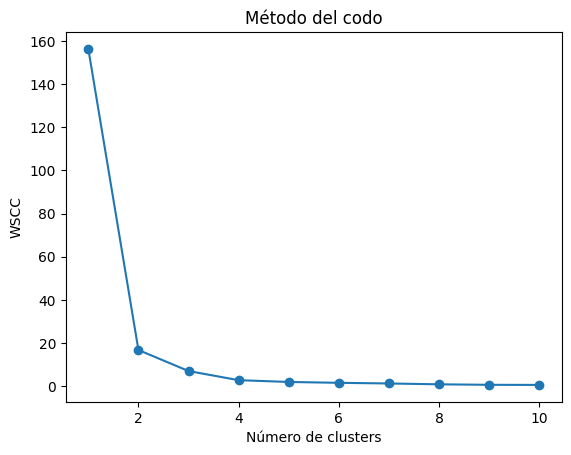

In [47]:
from sklearn.cluster import KMeans

# Seleccionar solo las columnas numéricas para el clustering
data_numeric = data_norm.drop(columns=['Country Name'])

wscc = [] # Within cluster sum of squares

# Iterar sobre un rango de números de clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(data_numeric) # Aplicamos KMeans solo a los datos numéricos
    wscc.append(kmeans.inertia_)

# Graficar la curva del codo
plt.plot(range(1, 11), wscc, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WSCC')
plt.show()


In [49]:
wscc

[156.2353626792667,
 16.784621904299343,
 7.037722042014413,
 2.8102651669229024,
 1.9805039090250485,
 1.586735077479256,
 1.2783308896233108,
 0.8923217919254718,
 0.6586711420207364,
 0.608839409776494]

In [52]:
# Creamos el modelo de KMeans con 3 clusters
clustering = KMeans(n_clusters=2, max_iter=300)

# Aplicamos el modelo a los datos normalizados
clustering.fit(data_norm.drop(columns=['Country Name']))  # Excluimos la columna 'Country Name'

# Añadimos una nueva columna al DataFrame con las etiquetas de cluster
data_norm['KMeans_Cluster'] = clustering.labels_

# Imprimimos las primeras filas del DataFrame para verificar
print(data_norm.head())


            2011      2012      2013      2014     2015      2016      2017  \
101048  0.032697  0.029938  0.030055  0.035938  0.03856  0.038748  0.049641   
101049  0.032697  0.029938  0.030055  0.035938  0.03856  0.038748  0.049641   
101050  0.032697  0.029938  0.030055  0.035938  0.03856  0.038748  0.049641   
101051  0.032697  0.029938  0.030055  0.035938  0.03856  0.038748  0.049641   
101052  0.032697  0.029938  0.030055  0.035938  0.03856  0.038748  0.049641   

            2018      2019      2020     2021   Total Country Name  \
101048  0.050848  0.056119  0.055036  0.06142  0.0449       Belize   
101049  0.050848  0.056119  0.055036  0.06142  0.0449       Belize   
101050  0.050848  0.056119  0.055036  0.06142  0.0449       Belize   
101051  0.050848  0.056119  0.055036  0.06142  0.0449       Belize   
101052  0.050848  0.056119  0.055036  0.06142  0.0449       Belize   

        KMeans_Cluster  
101048               0  
101049               0  
101050               0  
1010